# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

Word to search: Mark
Scalefactor to use in face recognition (typical 1.01-1.5, 1.35 recommended): 1.35
Initializing analysis of readonly/images.zip
Word to search: Mark
Face scalefactor used: 1.35
Analyzing file: a-0.png in readonly/images.zip
File 1 of 14
Word list generation in progress. Please be patient...
Word match is: True
Face ID in progress. Please be patient...
Number of faces found: 6
File a-0.png analysis complete!
Analyzing file: a-1.png in readonly/images.zip
File 2 of 14
Word list generation in progress. Please be patient...
Word match is: True
Face ID in progress. Please be patient...
Number of faces found: 5
File a-1.png analysis complete!
Analyzing file: a-10.png in readonly/images.zip
File 3 of 14
Word list generation in progress. Please be patient...
Word match is: False
Number of faces found: 0
No faces found
File a-10.png analysis complete!
Analyzing file: a-11.png in readonly/images.zip
File 4 of 14
Word list generation in progress. Please be patient...
Word matc

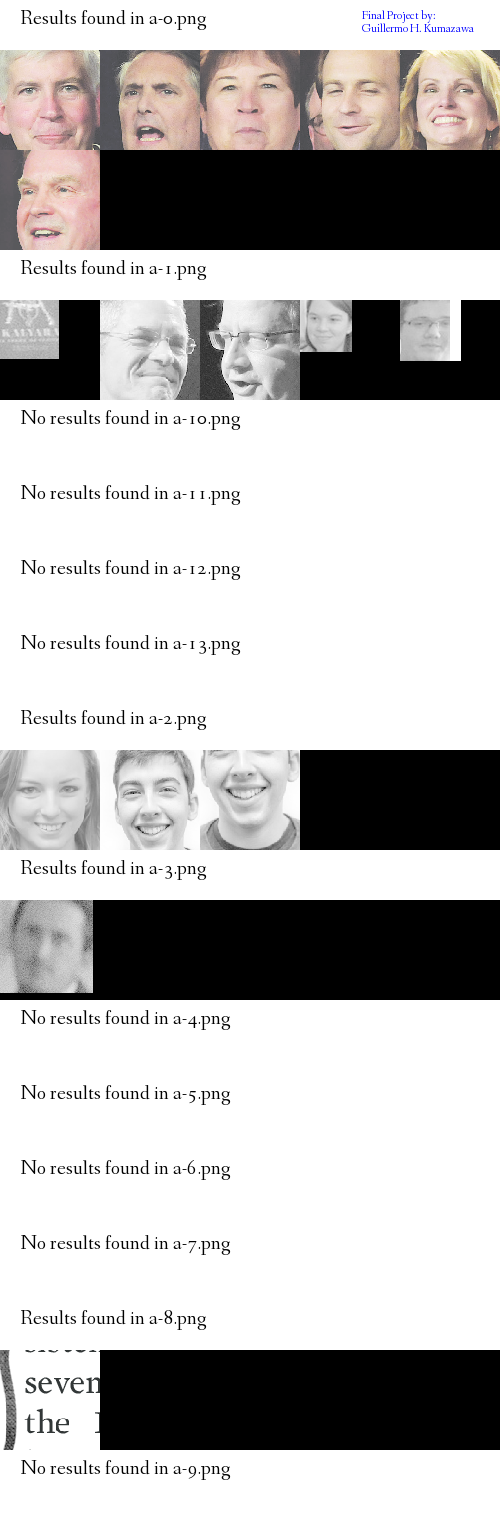

All done!


In [2]:
# Python 3 Specialization Final Project
# Edited to run in Coursera Jupyter Notebook to use the files in the server.

import cv2 as cv
import numpy
import PIL
from PIL import Image, ImageDraw, ImageFont
from PIL import ImageEnhance
import pytesseract
import zipfile

######################################################################
##### FUNCTIONS ######################################################
######################################################################

# Function that takes an image taken from Image.open(file) and resizes it:
def image_resize_pil(file_image_pil,int_perc_resize):
    w,h = file_image_pil.size
    w_res = int(w*int_perc_resize/100)
    h_res = int(h*int_perc_resize/100)
    img_resize_new_pil = file_image_pil.resize((w_res, h_res))
    return img_resize_new_pil

# Function that takes an image taken from cv.imread(file) and resizes it:
def image_resize_cv(file_image_cv,int_perc_resize):
    width = int(file_image_cv.shape[1] * int_perc_resize / 100)
    height = int(file_image_cv.shape[0] * int_perc_resize / 100)
    dim = (width, height)
    # resize image
    img_resize_new_cv = cv.resize(file_image_cv, dim, interpolation = cv.INTER_AREA)
    return img_resize_new_cv



# Function that takes an image taken from Image.open(file),
# and extracts the words using pytesseract,
# in the form of a list of words
def image_get_words(file_image_pil):
    # pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files (x86)\Tesseract-OCR\tesseract.exe"
    # print(pytesseract.image_to_string(image))
    print("Word list generation in progress. Please be patient...")
    str_words = pytesseract.image_to_string(file_image_pil)
    str_words = str_words.strip()
    str_words = str_words.replace("\n", " ").replace("\t", " ")
    str_words = str_words.replace(".", " ").replace(",", " ").replace(":", " ").replace(";", " ")
    lst_words = str_words.split(" ")
    lst_words_unique = []
    for word in lst_words:
        if word not in lst_words_unique:
            lst_words_unique.append(word)

    return lst_words_unique



# Function that takes an image taken from Image.open(file),
# scaleFactor, min width, and min height
# and extracts the faces found using cv,
# which must be larger than the min width and min height
# in the form of a list of images
def image_get_faces(file_image_pil, scaleFactor, min_w=100, min_h=100):

    print("Face ID in progress. Please be patient...")

    face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml') # Server file !!!
    #eye_cascade = cv.CascadeClassifier('haarcascade_eye.xml')

    pil_img = file_image_pil.convert("RGB")

    # create cv image file from pil image:
    cv_img = numpy.array(pil_img)
    cv_img = cv_img[:, :, ::-1].copy()
    cv_img_gray = cv.cvtColor(cv_img, cv.COLOR_BGR2GRAY)

    #cv_img=cv.imread(file_image)

    # Run face detection program:
    faces = face_cascade.detectMultiScale(cv_img_gray,scaleFactor)


    # Set our drawing context
    #drawing=ImageDraw.Draw(pil_img)

    crop_faces_list = []
    for x,y,w,h in faces:
        # That might be new syntax for you! Recall that faces is a list of rectangles in (x,y,w,h)
        # format, that is, a list of lists. Instead of having to do an iteration and then manually
        # pull out each item, we can use tuple unpacking to pull out individual items in the sublist
        # directly to variables. A really nice python feature
        #
        # Now we just need to draw our box
        # drawing.rectangle((x,y,x+w,y+h), outline="white")
        pil_img_crop = pil_img.crop((x,y,x+w,y+h))
        w,h = pil_img_crop.size

        if w > min_w and h > min_h:
            crop_faces_list.append(pil_img_crop)

    return crop_faces_list


# Function that creates a contact sheet based on a list of images
def contact_sheet_make(list_face_images):
    num_faces = len(list_face_images)
    if num_faces>0:
        # create a contact sheet
        first_image=list_face_images[0]

        w = 100
        if num_faces%5>0:
            h = 100 *(num_faces//5 + 1)
        else:
            h = 100 *(num_faces//5)

        contact_sheet=PIL.Image.new(first_image.mode, (w*5,h))

        x=0
        y=0

        for face in list_face_images:
            if face.size[0] > 100 or face.size[1]>100:
                img = face.resize((100, 100))
            else:
                img = face
            # Lets paste the current image into the contact sheet
            contact_sheet.paste(img, (x, y) )
            # Now we update our X position. If it is going to be the width of the image, then we set it to 0
            # and update Y as well to point to the next "line" of the contact sheet.
            if x+100 >= contact_sheet.width:
                x=0
                y=y+100
            else:
                x=x+100

        # resize and display the contact sheet
        #contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))

        #contact_sheet.show()
        #display(contact_sheet)

        return contact_sheet


    if num_faces==0:
        print("No faces found")
        # create a blank contact sheet
        contact_sheet = PIL.Image.new(mode = "RGB", size = (500, 25), color = 'white')
        #contact_sheet.show()
        return contact_sheet



# Function that creates a caption on top of an image
def add_caption(file_image, str_image_name, int_num_faces, bool_word_match=True):
    h = 0
    w,h = file_image.size
    w = 500
    image_border = Image.new('RGB',(w,h+50),'white')
    image_border.paste(file_image,(0,50))

    #image_border.show()

    draw = ImageDraw.Draw(image_border)
    font = ImageFont.truetype('readonly/fanwood-webfont.ttf',20) # Server file!
    color = 'rgb(0, 0, 0)' # white color

    # draw the message on the background

    (x, y) = (20, 10)

    if bool_word_match ==False:
        str = "No results found in {}".format(str_image_name)
        draw.text((x, y), str, fill=color, font=font)
        return image_border

    if int_num_faces == 0 and bool_word_match == True:
        str = "Results found in {} \nBut there were no faces in that file!".format(str_image_name)
        draw.text((x, y), str, fill=color, font=font)
        return image_border

    if int_num_faces > 0 and bool_word_match == True:
        str = "Results found in {}".format(str_image_name)
        draw.text((x, y), str, fill=color, font=font)
        return image_border

    return image_border


# Function that creates an image with all the results given a list of images that contain the results
def contact_sheet_final(img_list):
    # Create contact sheet
    final_size = [0,0]
    for img in img_list:
        w,h = img.size
        if w > final_size[0]:
            final_size[0] = w
        final_size[1] += h

    final_size = tuple(final_size)
    #print(final_size)
    contact_sheet_final = PIL.Image.new(mode = "RGB", size = final_size, color = 'black')

    # Paste images in contact sheet
    x = 0
    y = 0

    for img in img_list:
        contact_sheet_final.paste(img, (x, y) )
        y += img.size[1]

    #contact_sheet_final.show()
    return contact_sheet_final


# Function to add a watermark
def watermark_text(input_image, text, pos):

    img_final = input_image

    # make the image editable
    drawing = ImageDraw.Draw(img_final)

    color = 'rgb(0, 0, 255)' # blue color
    font = ImageFont.truetype('readonly/fanwood-webfont.ttf', 12)
    drawing.text(pos, text, fill=color, font=font)

    return img_final


######################################################################
##### PROGRAM START ##################################################
######################################################################

#img_name = 'a-0_-_faces_00.png'

str_word = input('Word to search: ')

scalefactor = input('Scalefactor to use in face recognition (typical 1.01-1.5, 1.35 recommended): ')

scalefactor = float(scalefactor)

# Face image min dimensions:
min_w = 50
min_h = 50


# zip_iter = 0

#zip_name = 'readonly/small_img.zip' # Modify as needed !!!!!
zip_name = 'readonly/images.zip' # Modify as needed !!!!!



print("Initializing analysis of {}".format(zip_name))
print("Word to search: {}".format(str_word))
print("Face scalefactor used: {}".format(scalefactor))


zip_file = zipfile.ZipFile(zip_name)

list_files = zip_file.namelist()
list_files_total = len(list_files)

zip_iter = 0


# Results will be stored here:
results_img_list = []

for file in list_files:
    file1 = zip_file.open(list_files[zip_iter])
    file_name = list_files[zip_iter]

    zip_iter += 1

    print("Analyzing file: {} in {}".format(file_name, zip_name))
    print("File {} of {}".format(zip_iter,list_files_total))


    # print(type(file1))

    pil_img = Image.open(file1)

    #print(type(pil_img.size))
    #print(pil_img.size)

    pil_img_size = pil_img.size


    # Note: If the image is too large, the program may cause an exception due to
    # lack of memory. If there is no problem, then this can be ommited:
    if pil_img.size[0] > 6500 or pil_img.size[1] > 6500:
        resize_perc = 50
        #min_w = 50
        #min_h = 50

    else:
        resize_perc = 100
        #min_w = 50
        #min_h = 50

    # pil_img = pil_img.convert("RGB")

    #pil_img = Image.open('a-0_-_faces_00.png')


    pil_img_res = image_resize_pil(pil_img,resize_perc)
    # pil_img_res.show()

    #cv_img=cv.imread(file1)
    #cv_img_res = image_resize_cv(cv_img,resize_perc)
    #cv_img_res.show()


    list_words = image_get_words(pil_img_res)

    match_flag = str_word in list_words

    print("Word match is: {}".format(match_flag))
    # print(list_words[:100])


    if match_flag == True:
        faces_list = image_get_faces(pil_img_res, scalefactor, min_w, min_h)

    else:
        faces_list = []

    num_faces = len(faces_list)
    print("Number of faces found: {}".format(num_faces))

    # for face in faces_list:
    #     face.show()


    contact_sheet = contact_sheet_make(faces_list)

    final_image = add_caption(contact_sheet, file_name, num_faces, match_flag)

    print("File {} analysis complete!".format(file_name))


    #final_image.show()
    results_img_list.append(final_image)


final_result = contact_sheet_final(results_img_list)

print("Printing final results!")

# final_result.show()
# display(final_result) # uncomment when using jupyter


w = final_result.size[0]
h = final_result.size[0]

final_img_watermark = watermark_text(final_result, 'Final Project by: \nGuillermo H. Kumazawa', (w*.725, h*.02))

# final_img_watermark.show()
display(final_img_watermark) # uncomment when using jupyter


print("All done!")
